<a href="https://colab.research.google.com/github/Janainareisnascimento/Adsensefinal/blob/main/2022_Adsense_modelagem_team_mounted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Habilitando o acesso ao Google Drive no Colab**

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
from google.colab import drive


# **2) Bibliotecas fundamentais**

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configurar o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Módulos de DataPrep
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# Modelos de regressão que serão testados
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 

# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Configurar o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# **3) Perguntas a serem respondidas**


1.   Qual o valor de monetização/mês realizado por canal na modalidade Reserva?
2.   Qual o valor de monetização/mês realizado por canal na modalidade Leilão?
3. O valor de monetização/mês na modalidade reserva é compativel com nosso baseline?
4.  O valor de monetização/mês na modalidade Leilão é compativel com nosso baseline?
3. Qual foi o valor total monetizado na modalidade reserva no período?
4. Qual foi o valor total monetizado na modalidade Leilão no período?
5. Qual a relação entre valor monetizado e engajamento do canal/vídeos?







# **4) Hipóteses a serem testadas**



1.  O intervalo entre os relatórios financeiros correspondem ao intervalo a ser considerado na extração mensal de receitas dos canais;
2. A soma de todas as features de receita correspondem ao valor monetizado por canal; 
3. A normalização do valor total de receitas declaradas no relatorio financeiro, juntamente com a porcentagem do valor por canal, nos levam ao valor total monetizado no canal/mês;





# **5) Importando a base de dados**

In [36]:
base = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adsense/2022_afiliados_receitas - Dados da tabela.csv")

# **6) Análise exploratória dos dados**

In [37]:
base.head()


,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,"0,96",602699011,"1,684","1,311",774071241,"31255,429","1014819,187",34701,"52094,303","526564,764","557820,193","1,065","36941,94",1026222679,"87264022,19",0:05:06,"686424,794"
1,UCcXV2JeP2g9kmXP9-F1xjrg,Futirinhas,"1,319",44268995,"2,283","1,709",59147595,"3831,95","101064,691",610,"3320,488","51747,039","55578,989","0,362","220,92",44929573,"4670970,242",0:06:14,"59120,397"
2,UCxcDCeShqZWIUQuEo2iJSVA,Mauricio Meirelles,"2,49",19807428,"4,217","2,922",28583793,"17580,053","83527,419",16,"10796,793","28366,259","45946,312","1,154","18,46",27671811,"7446994,056",0:16:08,"56761,565"
3,UCriRvZSnEFPSMqSya2s2U6g,Banheiristas,"0,598",46212494,"1,552","1,146",62574290,"3858,357","71733,121",0,"1029,714","35584,203","39442,56",NaN,0,69950500,"8379176,077",0:07:11,"40472,274"
4,UCf0bs928KW_GIN6q0XeiJ2Q,RaFla Mello,"1,18",39777901,"1,636","1,281",50792558,"42,103","65088,285",563,"736,152","35762,327","35804,43","0,976","549,39",32147861,"2523845,662",0:04:42,"37089,972"


In [38]:
base = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adsense/2022_afiliados_receitas - Dados da tabela.csv")

In [39]:
base.head(15)



,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,"0,96",602699011,"1,684","1,311",774071241,"31255,429","1014819,187",34701,"52094,303","526564,764","557820,193","1,065","36941,94",1026222679,"87264022,19",0:05:06,"686424,794"
1,UCcXV2JeP2g9kmXP9-F1xjrg,Futirinhas,"1,319",44268995,"2,283","1,709",59147595,"3831,95","101064,691",610,"3320,488","51747,039","55578,989","0,362","220,92",44929573,"4670970,242",0:06:14,"59120,397"
2,UCxcDCeShqZWIUQuEo2iJSVA,Mauricio Meirelles,"2,49",19807428,"4,217","2,922",28583793,"17580,053","83527,419",16,"10796,793","28366,259","45946,312","1,154","18,46",27671811,"7446994,056",0:16:08,"56761,565"
3,UCriRvZSnEFPSMqSya2s2U6g,Banheiristas,"0,598",46212494,"1,552","1,146",62574290,"3858,357","71733,121",0,"1029,714","35584,203","39442,56",NaN,0,69950500,"8379176,077",0:07:11,"40472,274"
4,UCf0bs928KW_GIN6q0XeiJ2Q,RaFla Mello,"1,18",39777901,"1,636","1,281",50792558,"42,103","65088,285",563,"736,152","35762,327","35804,43","0,976","549,39",32147861,"2523845,662",0:04:42,"37089,972"
5,UCIkAO7iHS6R9AtcABE9MdRQ,Energia 97 FM,"0,958",46703480,"1,298","1,084",55911814,"463,31","60606,643",1493,"10423,39","32661,88","33125,191","1,147","1711,8",47297132,"10136408,72",0:12:51,"45260,38"
6,UCV91rzdOwAThxQS79JcYsXQ,Gustavo Henrique Dando Choque,"1,187",27867392,"1,794","1,391",35946540,"16,788","49990,548",544,"576,249","27480,11","27496,897","1,154","627,93",24209019,"1761287,243",0:04:21,"28701,076"
7,UCU7uY3wCPh9j39KXzOpqNaw,Julio Cocielo,"0,602",24458667,"1,477","1,11",32526912,"0,291","36120,81",6,"817,462","19862,672","19862,964","0,578","3,47",34336638,"3387284,938",0:05:55,"20683,896"
8,UCPrYKS7TByOIwWvAt3tsV-A,Arnaldo e Tironi,"2,646",12718488,"2,624","1,936",17237685,"0,215","33373,088",7589,"5655,56","18361,702","18361,917","1,204","9134,37",12582485,"4187021,857",0:19:57,"33151,847"
9,UCMPPsRQg12IYk2V7vOfx-9A,Vosso Canal,"0,547",19064545,"1,392","1,078",24617266,"1047,31","26536,518",12,"256,257","13501,608","14548,917","1,063","12,76",40356691,"2794146,191",0:04:09,"14817,934"


In [40]:
base.tail(15)


,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
482,UCs-6sCz2LJm1PrWQN4ErsPw,TNT Sports Brasil,"0,028",26,"1,231","1,067",30,"0,003","0,032",0,0,"0,003","0,006",NaN,0,37,"1,693",0:02:44,"0,006"
483,UCyGQnOAy1utvzSPXwMjYp2w,Programa Reclame,"0,321",16,2,"1,882",17,0,"0,032",0,"0,01","0,009","0,009",NaN,0,56,"3,3464",0:03:35,"0,018"
484,UCTiIVm9iGyoo9OKAD5r1jcg,Futebol Arte,"0,06",1,30,30,1,0,"0,03",0,"0,003","0,005","0,005",NaN,0,134,"2,6248",0:01:10,"0,008"
485,UCA-PFvxMrBBYMtBxVdzUxoA,Liga Paulista Futsal,"0,889",2,"14,5","14,5",2,0,"0,029",0,0,"0,008","0,008",NaN,0,9,"0,2588",0:01:43,"0,008"
486,UCQE-cQWSpAqPr_429lWm8IQ,Multiverse Moo,"2,444",1,29,29,1,0,"0,029",0,"0,001","0,022","0,022",NaN,0,9,"0,3428",0:02:17,"0,022"
487,UCgTDLrMHWjRJFu1X7ACx3cw,No Guts No Glory,1,4,"7,25","7,25",4,0,"0,029",0,0,"0,008","0,008",NaN,0,8,"0,0625",0:00:28,"0,008"
488,UCoiOOEQi6yPwJyGjACh_NCA,De Olho No Futebol,"0,015",2,"14,5","14,5",2,0,"0,029",0,"0,02","0,016","0,016",NaN,0,2454,"103,166",0:02:31,"0,036"
489,UCCfx5tbsk4Lx2sGcnTZCjWw,Dreadly Monk,"0,441",11,"2,455","1,5",18,0,"0,027",0,"0,001","0,015","0,015",NaN,0,34,"1,6199",0:02:51,"0,015"
490,UC16c6rHsBCmHd-7ufc1ZZbA,CANAL TIRO DE META,"0,255",19,"1,368","1,083",24,0,"0,026",0,0,"0,014","0,014",NaN,0,55,"1,7794",0:01:56,"0,014"
491,UCAi_MmZdY2LlteyQtnSrpaw,Motorsport Live Magyarország,"0,689",18,"1,389","1,087",23,0,"0,025",0,"0,017","0,014","0,014",NaN,0,45,"1,8747",0:02:29,"0,031"


In [41]:
display(base)

,Canal,Título do canal,RPM (USD),Estimativa de reproduções monetizadas,CPM baseado em exibição (USD),CPM (USD),Impressões de anúncios,Sua receita estimada do DoubleClick (USD),Receita de anúncios no YouTube (USD),Transações,Sua receita do YouTube Premium (USD),Sua receita estimada do Google AdSense (USD),Sua receita estimada de anúncios (USD),Sua receita por transação (USD),Sua receita de transações (USD),Visualizações,Tempo de exibição (horas),Duração média da visualização,Sua receita estimada (USD)
0,Total,NaN,"0,96",602699011,"1,684","1,311",774071241,"31255,429","1014819,187",34701,"52094,303","526564,764","557820,193","1,065","36941,94",1026222679,"87264022,19",0:05:06,"686424,794"
1,UCcXV2JeP2g9kmXP9-F1xjrg,Futirinhas,"1,319",44268995,"2,283","1,709",59147595,"3831,95","101064,691",610,"3320,488","51747,039","55578,989","0,362","220,92",44929573,"4670970,242",0:06:14,"59120,397"
2,UCxcDCeShqZWIUQuEo2iJSVA,Mauricio Meirelles,"2,49",19807428,"4,217","2,922",28583793,"17580,053","83527,419",16,"10796,793","28366,259","45946,312","1,154","18,46",27671811,"7446994,056",0:16:08,"56761,565"
3,UCriRvZSnEFPSMqSya2s2U6g,Banheiristas,"0,598",46212494,"1,552","1,146",62574290,"3858,357","71733,121",0,"1029,714","35584,203","39442,56",NaN,0,69950500,"8379176,077",0:07:11,"40472,274"
4,UCf0bs928KW_GIN6q0XeiJ2Q,RaFla Mello,"1,18",39777901,"1,636","1,281",50792558,"42,103","65088,285",563,"736,152","35762,327","35804,43","0,976","549,39",32147861,"2523845,662",0:04:42,"37089,972"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,UCSmuDxuoyLuWNxHCtoWD4GA,Podcast umdois Testando,"0,02",12,"2,083","1,923",13,0,"0,025",0,"0,035","0,014","0,014",NaN,0,278,"35,9128",0:07:45,"0,049"
493,UC0XQZBQYMVQQgWqFjLzp2ww,THEBLOODSUCK,"0,65",8,3,"2,182",11,0,"0,024",0,0,"0,013","0,013",NaN,0,20,"0,2918",0:00:52,"0,013"
494,UC8rX-SbqCe0Nf5QtO-fO-yw,Fui Clear???,"1,327",5,"4,8","4,8",5,0,"0,024",0,"0,014","2,371","2,371",NaN,0,1797,"523,067",0:17:27,"2,385"
495,UCb2cM3MuZo4i1QntdDERjRw,Papo Desportivo,"0,361",9,"2,667","2,667",9,0,"0,024",0,0,"0,013","0,013",NaN,0,36,"2,2357",0:03:43,"0,013"


In [42]:
base.shape

(497, 19)

In [43]:
base.dtypes

Canal                                           object
Título do canal                                 object
RPM (USD)                                       object
Estimativa de reproduções monetizadas            int64
CPM baseado em exibição (USD)                   object
CPM (USD)                                       object
Impressões de anúncios                           int64
Sua receita estimada do DoubleClick (USD)       object
Receita de anúncios no YouTube (USD)            object
Transações                                       int64
Sua receita do YouTube Premium (USD)            object
Sua receita estimada do Google AdSense (USD)    object
Sua receita estimada de anúncios (USD)          object
Sua receita por transação (USD)                 object
Sua receita de transações (USD)                 object
Visualizações                                    int64
Tempo de exibição (horas)                       object
Duração média da visualização                   object
Sua receit

In [44]:
base.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Canal                                         497 non-null    object
 1   Título do canal                               496 non-null    object
 2   RPM (USD)                                     497 non-null    object
 3   Estimativa de reproduções monetizadas         497 non-null    int64 
 4   CPM baseado em exibição (USD)                 496 non-null    object
 5   CPM (USD)                                     497 non-null    object
 6   Impressões de anúncios                        497 non-null    int64 
 7   Sua receita estimada do DoubleClick (USD)     497 non-null    object
 8   Receita de anúncios no YouTube (USD)          497 non-null    object
 9   Transações                                    497 non-null    int64 
 10  Su

In [45]:
base.isnull().sum()

Canal                                             0
Título do canal                                   1
RPM (USD)                                         0
Estimativa de reproduções monetizadas             0
CPM baseado em exibição (USD)                     1
CPM (USD)                                         0
Impressões de anúncios                            0
Sua receita estimada do DoubleClick (USD)         0
Receita de anúncios no YouTube (USD)              0
Transações                                        0
Sua receita do YouTube Premium (USD)              0
Sua receita estimada do Google AdSense (USD)      0
Sua receita estimada de anúncios (USD)            0
Sua receita por transação (USD)                 423
Sua receita de transações (USD)                   0
Visualizações                                     0
Tempo de exibição (horas)                         0
Duração média da visualização                     0
Sua receita estimada (USD)                        0
dtype: int64

# **7) Análise gráfica**

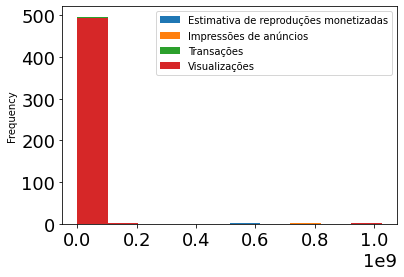

In [46]:
base.plot.hist();

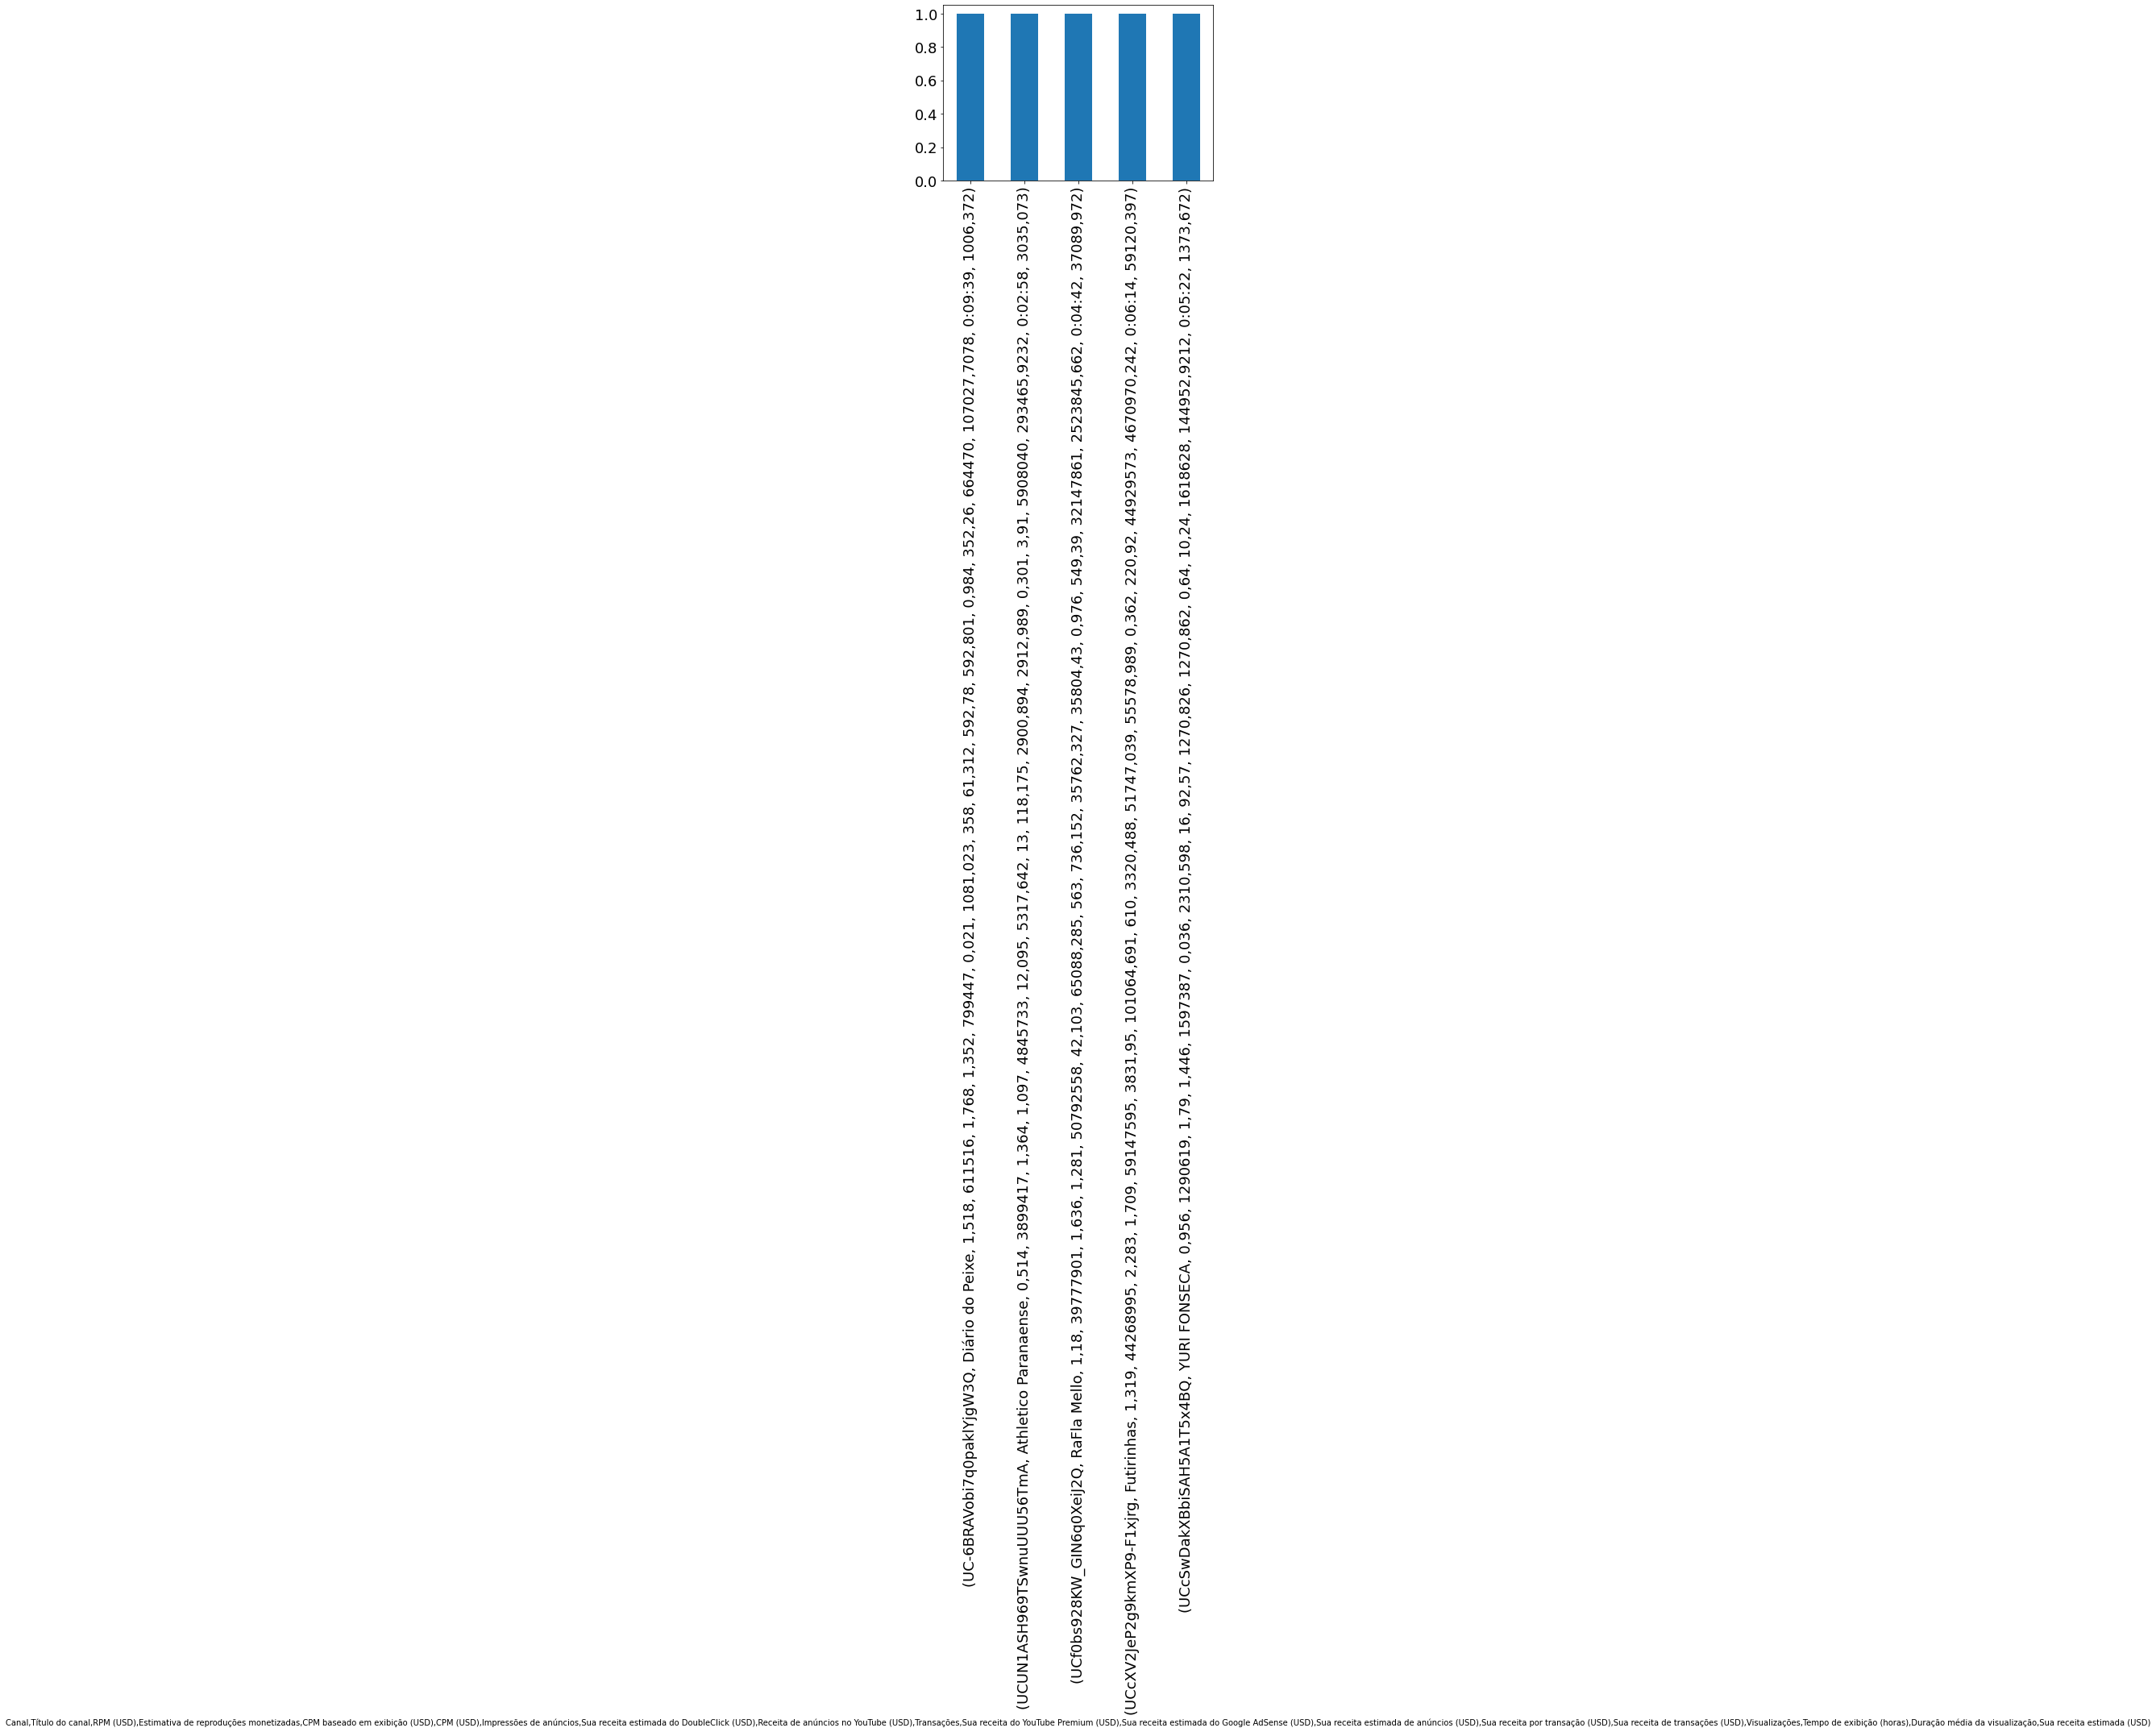

In [47]:
base.value_counts().head().plot.bar();

# **8) Análise estatística**

In [48]:
base_estatistica = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Adsense/2022_afiliados_receitas - Dados da tabela.csv")

In [49]:
base_estatistica.describe()

,Estimativa de reproduções monetizadas,Impressões de anúncios,Transações,Visualizações
count,497.00,497.00,497.00,497.00
mean,2425111.52,3114675.98,139.64,4127542.77
std,27436487.93,35245344.36,1634.29,46759693.04
min,0.00,1.00,0.00,1.00
25%,77.00,88.00,0.00,278.00
50%,1617.00,1756.00,0.00,2896.00
75%,116743.00,143925.00,0.00,165444.00
max,602699011.00,774071241.00,34701.00,1026222679.00


# **9) Criando automação WEB utilizando Selenium**

In [50]:
!pip install Selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.n

In [51]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',options=chrome_options)

wd.get("https://www.uol.com.br")
print(wd.title)

UOL - Seu universo online


In [52]:
wd.get("https://www.uol.com.br/")